In [1]:
import numpy as np
from tqdm import tqdm
from mpc import Controller
import matplotlib.pyplot as plt

from visualise import (
    plot_3d_control,
    plot_action_history,
    plot_state_history,
    plot_terminal_cost_lyupanov,
)

import terminal_set

from main import simulate
import scipy.linalg as la

Initial state is  [0.1 0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.  0. ]
Target state to reach is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
C is  None


Simulating: 100%|██████████| 100/100 [00:00<00:00, 21801.05it/s]


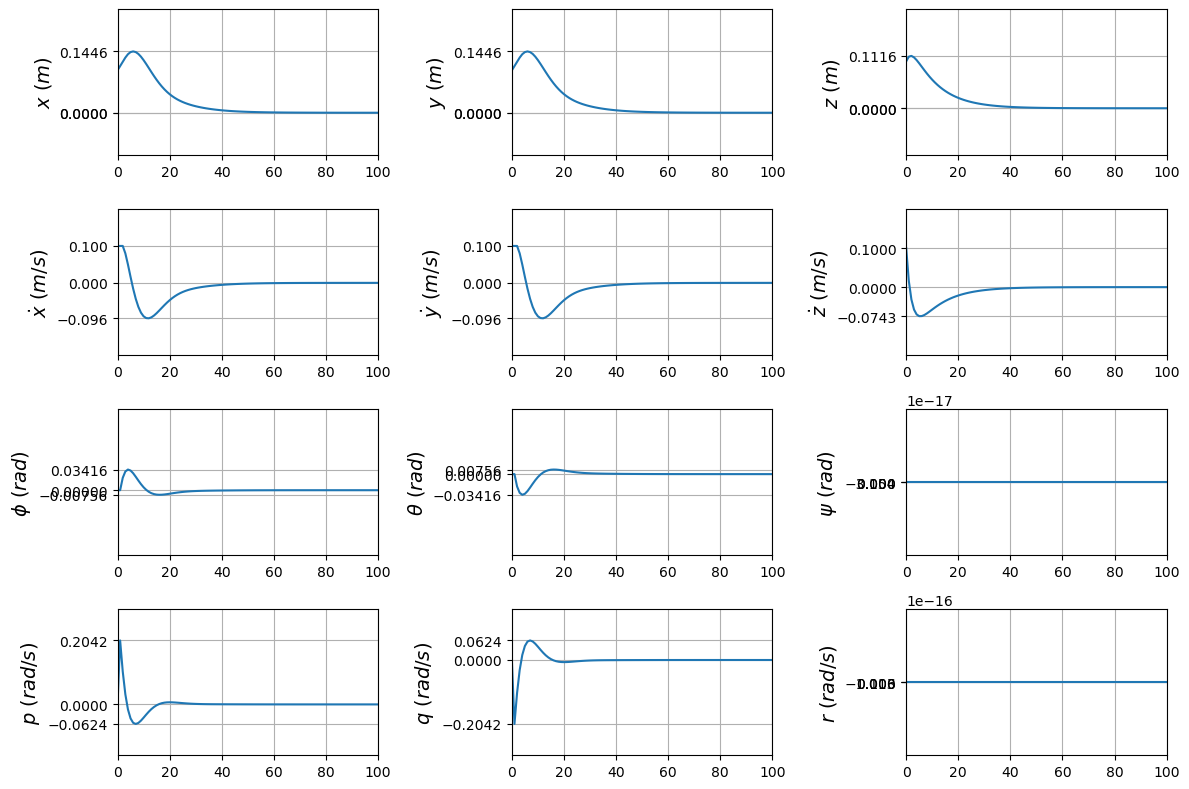

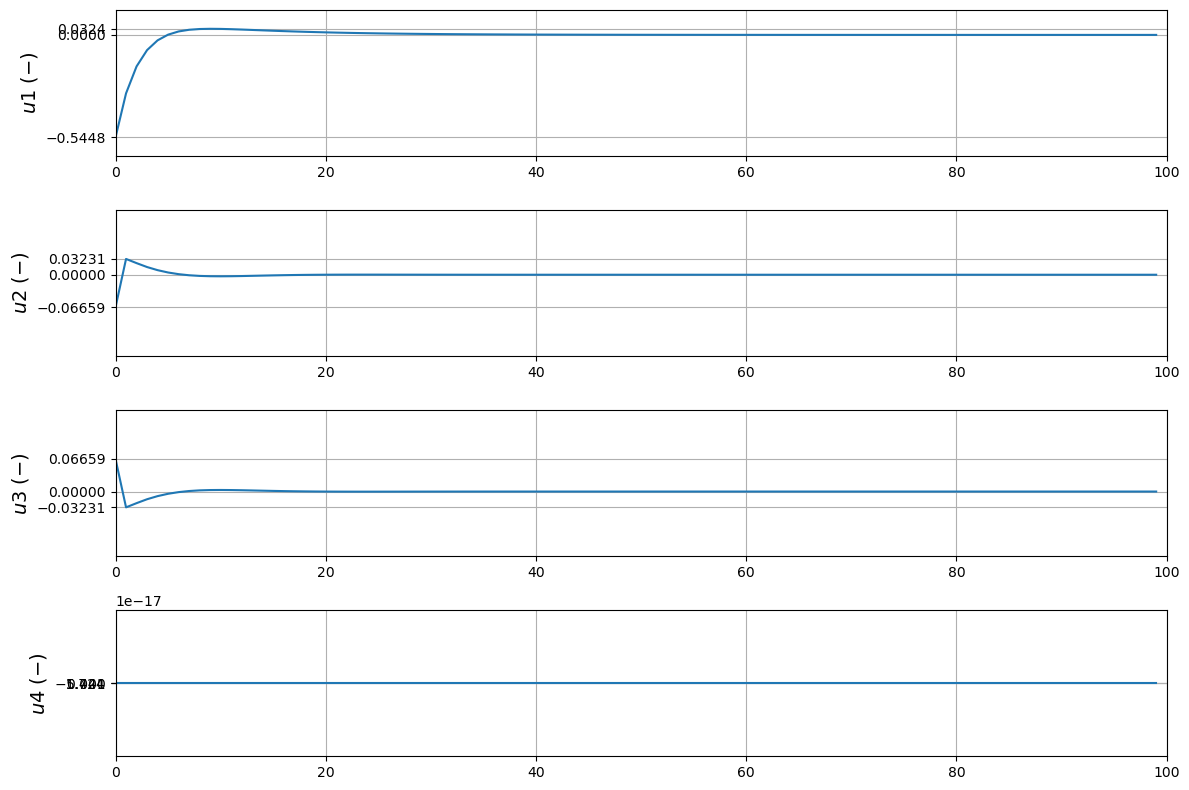

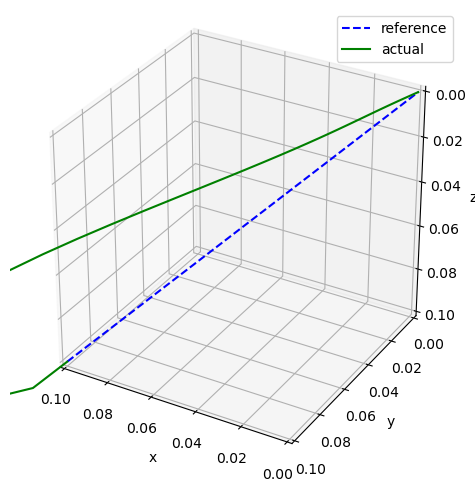

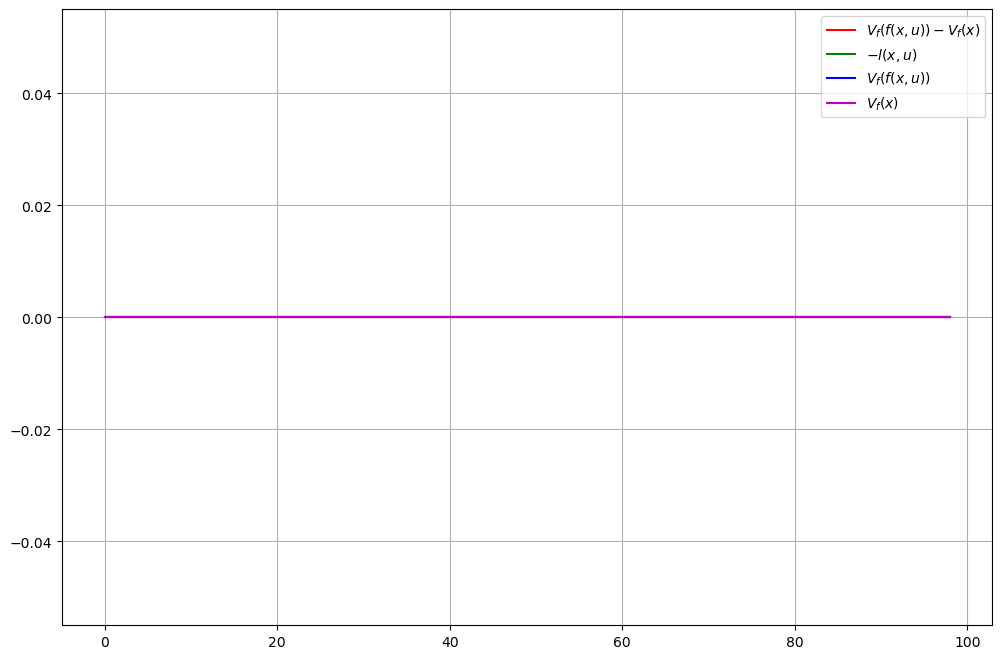

In [18]:
dt = 0.10  # Sampling period
N = 10 # MPC Horizon
T = 100  # Duration of simulation
x_init = np.zeros(12)  # Initial conditions
x_target = np.zeros(12)  # State to reach
x_init[0:3] = np.array([0.1, 0.1, 0.1])
x_init[3:6] = np.array([0.1, 0.1, 0.1])

print("Initial state is ", x_init)
print("Target state to reach is ", x_target)

 # Controller
ctrl = Controller(
    mpc_horizon=N,
    timestep_mpc_stages=dt,
    control_type='lqr' # or 'mpc'
)

# this also rebuilds mpc problem to include the new constraint
# Q: Can I have both of these methods working together?
# ctrl.c_level = terminal_set.calculate_c(ctrl, x_target) # this enables t set
ctrl.beta = 0.1 # this enables terminal cost


print("C is ", ctrl.c_level)

states, inputs, plans, timesteps, Vf, l = simulate(
    controller=ctrl,
    x_init=x_init,
    x_target=x_target,
    T=T,
    plot=True,
    plots_suffix="_terminal",
    compute_Vf_weird=False
)


In [9]:
# plans[12, N=30, t]
predicted_xn = plans[:, -1, :]
# predicted_xn
x_es = (predicted_xn.T - x_target)


In [10]:
predicted_xn[0, :]

array([5.36821134e-02, 4.85770565e-02, 4.39578120e-02, 3.97780579e-02,
       3.59959022e-02, 3.25734612e-02, 2.94764751e-02, 2.66739599e-02,
       2.41378925e-02, 2.18429255e-02, 1.97661300e-02, 1.78867624e-02,
       1.61860550e-02, 1.46470265e-02, 1.32543107e-02, 1.19940022e-02,
       1.08535173e-02, 9.82146764e-03, 8.88754687e-03, 8.04242751e-03,
       7.27766808e-03, 6.58562899e-03, 5.95939644e-03, 5.39271355e-03,
       4.87991803e-03, 4.41588575e-03, 3.99597968e-03, 3.61600363e-03,
       3.27216039e-03, 2.96101382e-03, 2.67945456e-03, 2.42466893e-03,
       2.19411087e-03, 1.98547646e-03, 1.79668089e-03, 1.62583762e-03,
       1.47123956e-03, 1.33134193e-03, 1.20474688e-03, 1.09018948e-03,
       9.86525108e-04, 8.92717961e-04, 8.07830744e-04, 7.31015287e-04,
       6.61504071e-04, 5.98602556e-04, 5.41682243e-04, 4.90174395e-04,
       4.43564354e-04, 4.01386397e-04, 3.63219087e-04, 3.28681057e-04,
       2.97427205e-04, 2.69145243e-04, 2.43552578e-04, 2.20393488e-04,
      

In [16]:
x_es.shape
x_es[:,0]

array([-9.99752079e-03, -1.02107813e-02, -1.03660969e-02, -1.04292427e-02,
       -1.05141893e-02, -1.05534194e-02, -1.05264942e-02, -1.05911723e-02,
       -1.05579403e-02, -1.05749687e-02, -1.05841910e-02, -1.06005325e-02,
       -1.06164477e-02, -1.06651473e-02, -1.06675015e-02, -1.07111223e-02,
       -1.07270829e-02, -1.07257613e-02, -1.07788568e-02, -1.07890460e-02,
       -1.08173569e-02, -1.08601271e-02, -1.09165688e-02, -1.09442710e-02,
       -1.09885491e-02, -1.10328194e-02, -1.10745609e-02, -1.11350950e-02,
       -1.11822270e-02, -1.12247893e-02, -1.12674807e-02, -1.13077757e-02,
       -1.13397805e-02, -1.13648649e-02, -1.13807238e-02, -1.11020198e-02,
       -1.00442733e-02, -9.08878446e-03, -8.22480570e-03, -7.44791270e-03,
       -6.74149675e-03, -6.09772627e-03, -5.49461075e-03, -4.99090048e-03,
       -4.50891868e-03, -4.08709587e-03, -3.69813158e-03, -3.34603868e-03,
       -3.02737600e-03, -2.73983604e-03, -2.48146009e-03, -2.24529868e-03,
       -2.01992032e-03, -

In [39]:
Vf_s = []
for x_e in x_es:
    Vf_s.append(x_e.T @ ctrl.P @ x_e)

Vf_s
    

[0.00419561624377978,
 0.004195492630625523,
 0.0041957980706597104,
 0.004194623078113623,
 0.004198917730335718,
 0.0041964224016406764,
 0.00419631126419597,
 0.004198103165847947,
 0.0041951741771648655,
 0.0041962307183600195,
 0.00419793750748506,
 0.004210694132108177,
 0.0041955727323829285,
 0.004195277104412013,
 0.00419520162469934,
 0.004197223016320559,
 0.004195194178138366,
 0.004195100181444905,
 0.004194779614795826,
 0.004195181344911111,
 0.0041951677545444994,
 0.004195491484234464,
 0.0041956499735327875,
 0.004195297855820344,
 0.003594623157198788,
 0.0029430341602459027,
 0.0024103199205739714,
 0.001973469133048129,
 0.0016160459553249105,
 0.0013233783082083421,
 0.0010836556590946823,
 0.00088728020702225,
 0.0007265052639182327,
 0.0005947768840968073,
 0.00048714388348553375,
 0.0003988888449406245,
 0.0003266162888507339,
 0.00026741907782579623,
 0.00021892660415353632,
 0.00017927936141730222,
 0.00014676666280267103,
 0.00012008496614295477,
 9.84066945

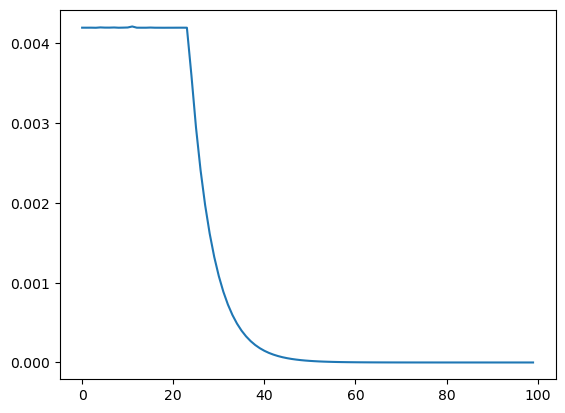

In [44]:
plt.plot(Vf_s[:-1])

In [5]:
k_f = 0.1
m = 0.5
g = 9.81
np.full(4, np.sqrt(m * g / (4 * k_f)))

array([3.50178526, 3.50178526, 3.50178526, 3.50178526])

In [6]:
ctrl.u_op

array([ 6.37432250e+00, -1.35364844e-16, -3.61182506e-16, -1.38777878e-17])